https://www.analyticsvidhya.com/blog/2021/09/ordinary-differential-equations-made-easy-with-deep-learning/

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

## check if GPU is available and use it; otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


Lagaris, 1

In [2]:
N = nn.Sequential(nn.Linear(1, 50), nn.Sigmoid(), nn.Linear(50,1, bias=False))

A = 0.
Psi_t = lambda x: A + x * N(x)  # A is the initial condition. Automatically satisfies init. condit
f = lambda x, Psi: torch.exp(-x / 5.0) * torch.cos(x) - Psi / 5.0

$$ \frac{d\psi}{dx} = e^{\frac{-x}{5}}\cos(x) - \frac{\psi}{5} $$ 
$$ \psi(0) = A = 0$$

# Our Loss function

In [3]:
def loss(x):
    ''' will be np.linspace(0, 2, 100)[:, None],  which is, a strange array of numbers equidistant
    from 0 to 2.'''

    x.requires_grad = True
    outputs = Psi_t(x) # Here all the system/graph of neural network is applied
    
    
    # Psi_t_x ----- is the guess function Psi derivated wrt x
    Psi_t_x = torch.autograd.grad(outputs, x, grad_outputs=torch.ones_like(outputs),
                        create_graph=True)[0]
    
    final_loss = torch.mean( ( Psi_t_x - f(x, outputs) )  ** 2)
    
    print('loss is', final_loss)

    return  final_loss

In [4]:
optimizer = torch.optim.LBFGS(N.parameters())
x = torch.Tensor(np.linspace(0, 2, 100)[:, None]) # x = input of the neural network

In [9]:
def closure():

    optimizer.zero_grad()
    l = loss(x)
    l.backward()
    
    return l


# Here train the neural network
for i in range(10):
    optimizer.step(closure)

loss is tensor(3.9213e-07, grad_fn=<MeanBackward0>)
loss is tensor(3.9213e-07, grad_fn=<MeanBackward0>)
loss is tensor(3.9213e-07, grad_fn=<MeanBackward0>)
loss is tensor(3.9213e-07, grad_fn=<MeanBackward0>)
loss is tensor(3.9213e-07, grad_fn=<MeanBackward0>)
loss is tensor(3.9213e-07, grad_fn=<MeanBackward0>)
loss is tensor(3.9213e-07, grad_fn=<MeanBackward0>)
loss is tensor(3.9213e-07, grad_fn=<MeanBackward0>)
loss is tensor(3.9213e-07, grad_fn=<MeanBackward0>)
loss is tensor(3.9213e-07, grad_fn=<MeanBackward0>)


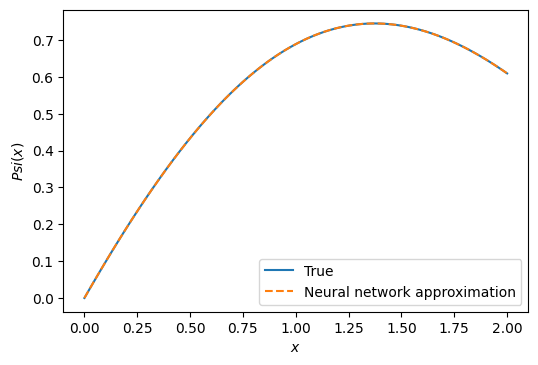

In [11]:
xx = np.linspace(0, 2, 100)[:, None]

with torch.no_grad():
    yy = Psi_t(torch.Tensor(xx)).numpy()
yt = np.exp(-xx / 5.0) * np.sin(xx)

fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label='True')
ax.plot(xx, yy, '--', label='Neural network approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('$Psi(x)$')
plt.legend(loc='best');

Lagaris, 2

In [12]:
N = nn.Sequential(nn.Linear(1, 50), nn.Sigmoid(), nn.Linear(50,1, bias=False))

In [13]:
A = 0.
B = 0.

In [14]:
Psi_t = lambda x: A*(1-x) + B * x + (1-x)* x * N(x)

In [15]:
f = lambda x, Psi: -1

In [16]:
def loss(x):

    x.requires_grad = True
    outputs = Psi_t(x)

    #we need Psi_x_x 
    #calculating gradient twice 

    Psi_t_x = torch.autograd.grad(outputs, x, grad_outputs=torch.ones_like(outputs),
                                            create_graph=True)[0]
    Psi_t_x_x = torch.autograd.grad(Psi_t_x, x, grad_outputs=torch.ones_like(Psi_t_x),
                                            create_graph=True )[0]

    total_loss = torch.mean((Psi_t_x_x - f(x, outputs)) ** 2)
    print("loss is ", total_loss)
    
    return torch.mean((Psi_t_x_x - f(x, outputs)) ** 2)

In [17]:
optimizer = torch.optim.LBFGS(N.parameters())
x = torch.Tensor(np.linspace(0, 1, 100)[:, None])

In [20]:
def closure():
    optimizer.zero_grad()
    l = loss(x)
    l.backward()
    return l

for i in range(10):
    optimizer.step(closure)

loss is  tensor(7.8883e-07, grad_fn=<MeanBackward0>)
loss is  tensor(7.8883e-07, grad_fn=<MeanBackward0>)
loss is  tensor(7.8883e-07, grad_fn=<MeanBackward0>)
loss is  tensor(7.8883e-07, grad_fn=<MeanBackward0>)
loss is  tensor(7.8883e-07, grad_fn=<MeanBackward0>)
loss is  tensor(7.8883e-07, grad_fn=<MeanBackward0>)
loss is  tensor(7.8883e-07, grad_fn=<MeanBackward0>)
loss is  tensor(7.8883e-07, grad_fn=<MeanBackward0>)
loss is  tensor(7.8883e-07, grad_fn=<MeanBackward0>)
loss is  tensor(7.8883e-07, grad_fn=<MeanBackward0>)


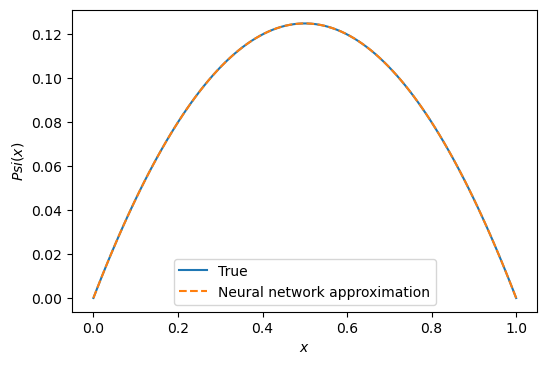

In [26]:
xx = np.linspace(0, 1, 100)[:, None]

with torch.no_grad():
    yy = Psi_t(torch.Tensor(xx)).numpy()

yt = (0.5) * (-xx**2 + xx ) #actual function pts

fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label='True')
ax.plot(xx, yy, '--', label='Neural network approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('$Psi(x)$')
plt.legend(loc='best');